# Исследование данных о продаже игр

В нашем распоряжении из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Описание данных:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

Наша задача — выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В данном исследовании мы изучим исходные данные. После чего подготовим данные и приступим к в выявлению закономерностей.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from scipy import stats as st

## Изучение общей информации

In [2]:
#Считываем данные из csv-файла в датафрейм и сохраняем в переменной data
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
#выведим первые 20 строчек датафрейма data на экран
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#выводим основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


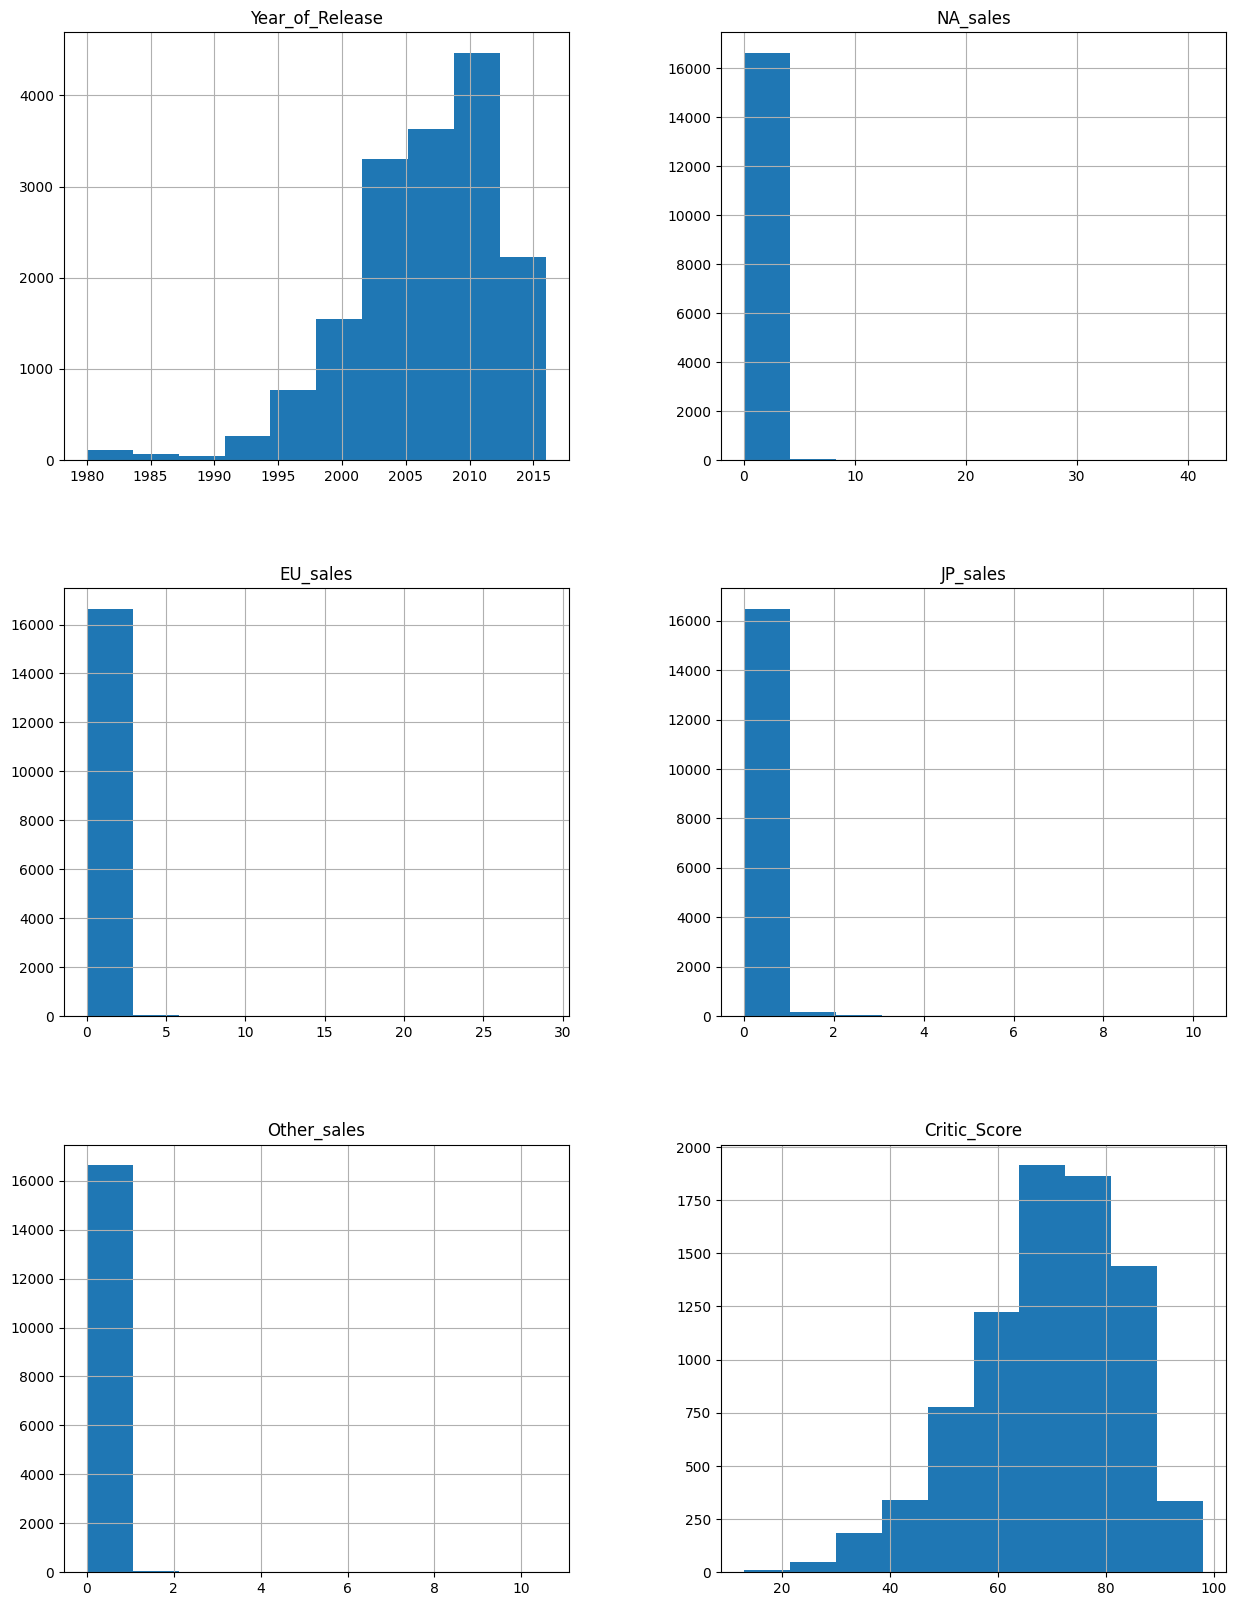

In [5]:
#строим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15, 20))
plt.show()

**Вывод: Исходя из полученных гистограмм и информации о датасете видно что перед нахождением особенностей и зависимостей на рынке игровой индустрии необходимо предобработать данные.**

## Подготовка данных

In [6]:
#приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [7]:
#проверяем есть ли в датасете явные строки-дубликаты 
data.duplicated().sum()

0

In [8]:
#cчитаем суммарные продажи во всех регионах и записываем их в отдельный столбец sales_total
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [9]:
#выводим количество пропущенных значений для каждого столбца и процент пропуска
pd.DataFrame({'Количество пропусков': data.isna().sum(), 'Процент пропусков': 100 * round(data.isna().sum() / len(data.index), 2)})

,Количество пропусков,Процент пропусков
name,2,0.0
platform,0,0.0
year_of_release,269,2.0
genre,2,0.0
na_sales,0,0.0
eu_sales,0,0.0
jp_sales,0,0.0
other_sales,0,0.0
critic_score,8578,51.0
user_score,6701,40.0


Так как в процентном соотношении строки с пропусками составляют менее 5 процентов от общей выборки, удаляем из датасета строчки с пропусками в столбцах name, year_of_release, genre.  

Пропусков в столбцах critic_score, user_score, rating очень много, их удаление может повлиять на результаты исследования.

In [10]:
#удаляем из датасета строчки с пропусками в столбцах name, year_of_release, genre
#data = data.dropna(subset=['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating'])

#удаляем из датасета строчки с пропусками в столбцах name, year_of_release, genre
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

In [11]:
# код ревьюера
data.shape[0] / 16715

0.9837870176488184

In [12]:
tbd_count = data.query('user_score == "tbd"')['user_score'].count()
print('Количество значений tbd:', tbd_count)
print('Процент значений tbd:', 100 * round(tbd_count / len(data.index), 2))

Количество значений tbd: 2376
Процент значений tbd: 14.000000000000002


Обратим внимание, что в столбце с оценкой пользователей есть значения с абревиатурой 'tbd'. Эта абревиатура на английском означате to be determined. То есть это значения которые будут заполнены, когда будет больше информации. Всего таких строк - 1052 или 13 процента, что существенно. Поэтому удалять эти строки мы не будем так, как само значение tbd несет в себе информацию. Создадим новый столбец, где вместо вместо значения 'tbd' в столбце user_score запишем пропуск.

In [13]:
data['user_score_cor'] = data['user_score']
#data.loc[data['user_score_cor'] == 'tbd', 'user_score_cor'] = data['critic_score'] / 10

In [14]:
#преобразуем данные в нужные типы
data['year_of_release'] = data['year_of_release'].astype('int')
#data['critic_score'] = data['critic_score'].astype('int')
data['user_score_cor'] = pd.to_numeric(data['user_score_cor'], errors='coerce')

#заменим пропуски в столбце rating на значение without
data['rating'] = data['rating'].fillna('without') 

Меняем тип данных в столбцах year_of_release на целочисленный. В столбце user_score_cor меняем тип данных со строки на численный.

In [15]:
#проверяем информацию о типах данных после преобразования
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
 11  sales_total      16444 non-null  float64
 12  user_score_cor   7463 non-null   float64
dtypes: float64(7), int32(1), object(5)
memory usage: 1.7+ MB


**Вывод: Во время подготовки данных датасета были обработаны пропущенные значения, были изменены некорректные типы данных, датасет был проверен на явные дубликаты. Также значения 'tbd' были замены на пропуски. Пропущенные значения в столбце с рейтингом были заменены значением without. Устанив некорректные значения можно приступать к исследовательскому анализу данных.**

## Исследовательский анализ данных

### Определение актуального периода

In [16]:
#функция, считающая процент группы
def percent_share(x): return round(x.count()*100/len(data), 2)

In [17]:
#выводим количество выпущенных игр по годам в абсолютных и процентных значениях
data_groupby_year = data.groupby('year_of_release')['year_of_release'].agg(['count', percent_share])
print(data_groupby_year)

                 count  percent_share
year_of_release                      
1980                 9           0.05
1981                46           0.28
1982                36           0.22
1983                17           0.10
1984                14           0.09
1985                14           0.09
1986                21           0.13
1987                16           0.10
1988                15           0.09
1989                17           0.10
1990                16           0.10
1991                41           0.25
1992                43           0.26
1993                60           0.36
1994               121           0.74
1995               219           1.33
1996               263           1.60
1997               289           1.76
1998               379           2.30
1999               338           2.06
2000               350           2.13
2001               482           2.93
2002               829           5.04
2003               775           4.71
2004        

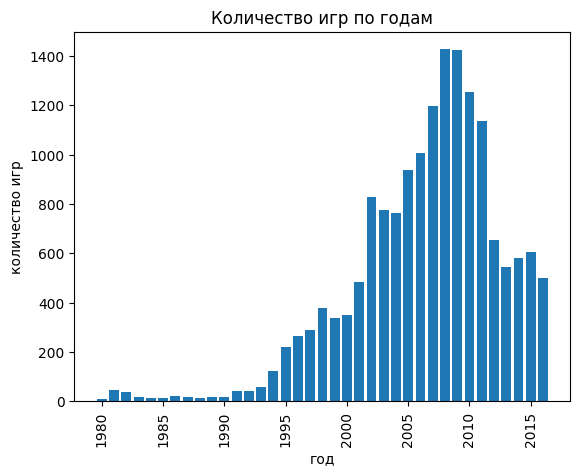

In [18]:
#построим столбчатую диаграмму для количества вышедших игр по годам
plt.bar(data_groupby_year.index, data_groupby_year['count'])
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(rotation=90)
plt.title('Количество игр по годам')
plt.xlabel('год')
plt.ylabel('количество игр')
plt.show()

На графике видно, что в нулевые годы количество вышедших игр резко увеличилось, но с 2009 наблюдается тред на снижение. 

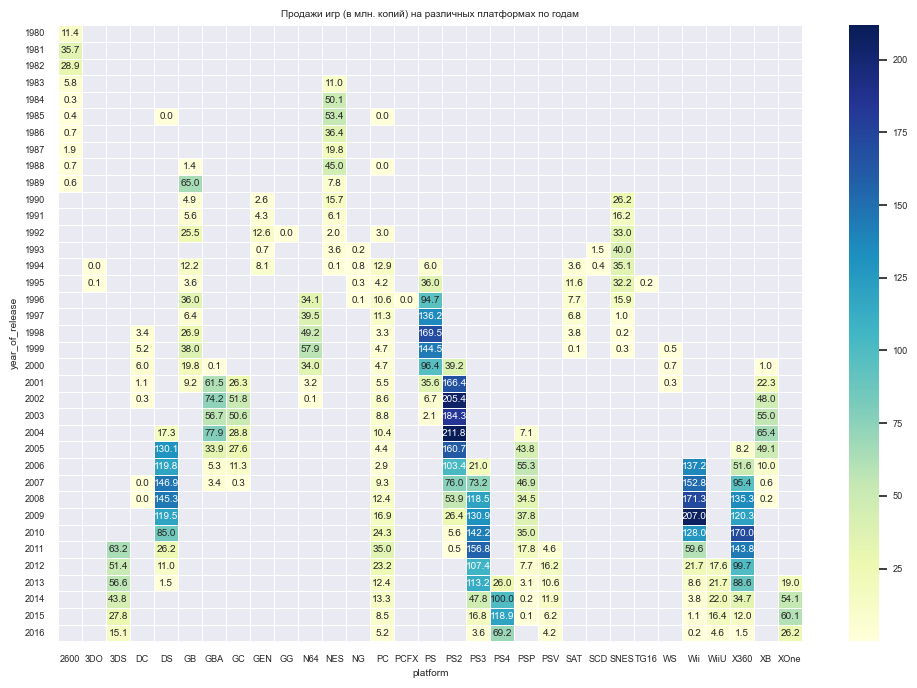

In [19]:
sns.set(font_scale=0.6) 

# Сложим количество продаж по платформам в пределах каждого года
sales_platforms_by_year = data.pivot_table(index=['year_of_release', 'platform'], values='sales_total', aggfunc='sum').reset_index()

# Построим тепловую карту продаж игр на различных платформах по годам
df_heatmap = sales_platforms_by_year.pivot(index="year_of_release", columns="platform", values="sales_total")

# Визуализация
plt.title('Продажи игр (в млн. копий) на различных платформах по годам')
sns.heatmap(df_heatmap, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.show()


Как видно из тепловой карты какие-то платформы, бывшие ранее популярными уже потеряли свою популярность, какие-то же появились недавно и только набирают популярность. Из нашего исследования можно исключить платформы на которых игры уже не выпускают: NES, GB, DS, PS2, SNES, GBA, N64, PS, XB, 2600, PSP, GC, GEN, DC, SAT, SCD, WS, NG, TG16, 3DO, GG, PCFX. В дальнейшем в рамках исследования внимание будет приковано к "действующим" платформам: 3DS, PC, PS3, PS4, PSV, Wii, WiiU, X360, XOne.

In [20]:
len(data.loc[(data['platform'] == 'DS') & (data['year_of_release'] < 1990)])

1

Судя по тепловой карте у платформы DS есть одно выбрасывающее значение в 1985 году, удалим эту запись из датасета.

In [21]:
data = data.drop([data.loc[(data['platform'] == 'DS') & (data['year_of_release'] < 1990)].index[0]])

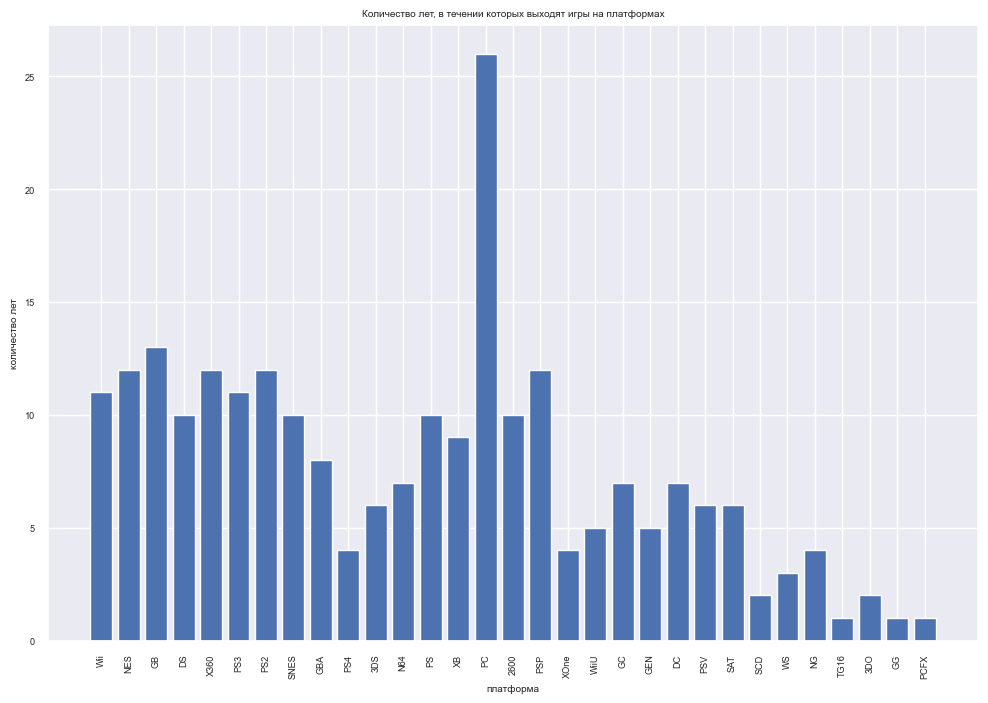

In [22]:
#создаем массивы для дальнейшей визуализации данных
platform = []
platform_years = []

#определим сколько лет существует каждая платформа
for i in data['platform'].unique():
  platform.append(i)
  platform_years.append(len(data.loc[data['platform'] == i]['year_of_release'].unique()))

#построим столбчатую диаграмму сколько лет на каждой платформе выходяд игры
plt.bar(platform, platform_years)
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(rotation=90)
plt.title('Количество лет, в течении которых выходят игры на платформах')
plt.xlabel('платформа')
plt.ylabel('количество лет')
plt.show()

Как видно из графика, самая долгоживущая платформа это PC. Кроме PC остальные платформы пользуются популярность не более 13 лет.

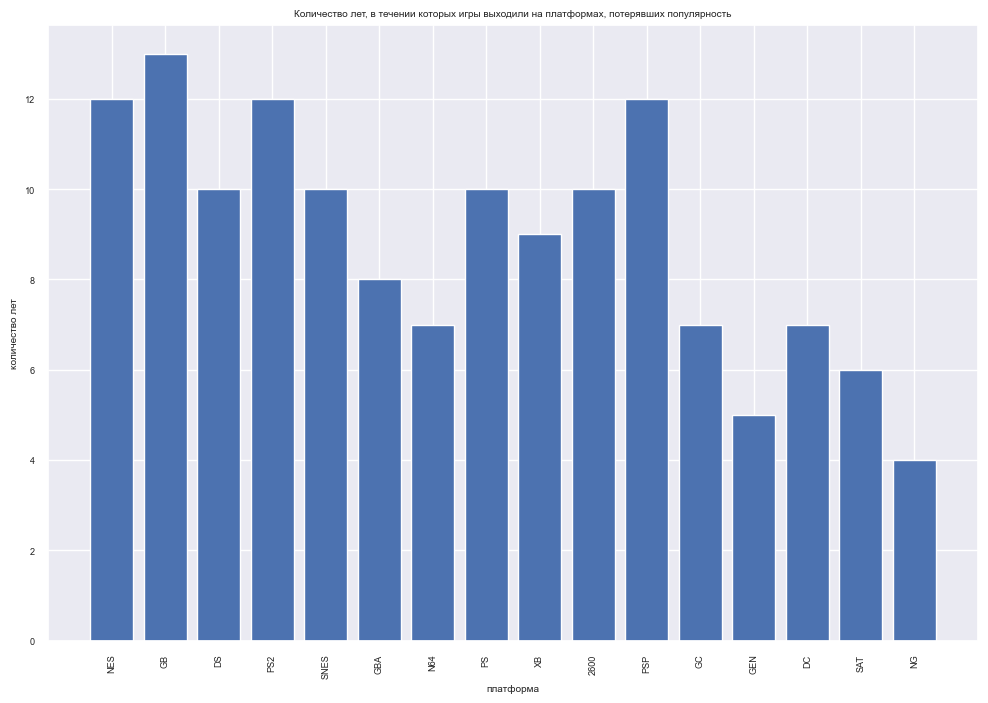

Средняя продолжительность популярности платформы: 8.875


In [23]:
#создаем массивы для дальнейшей визуализации данных
platform = {}
#определим сколько лет существует каждая платформа, потерявшая популярность
for i in data['platform'].unique():
      if i in ['NES', 'GB', 'DS', 'PS2', 'SNES', 'GBA', 'N64', 'PS', 'XB', '2600', 'PSP', 'GC', 'GEN',
               'DC', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']:
            platform[i] = len(data.loc[data['platform'] == i]['year_of_release'].unique())

#искключим платформы которые существоали 1-3 года как выбросы (такие платформы существовали на заре зарождения индустрии)
for i,j in platform.copy().items():
    if j < 4:
        platform.pop(i)
               
#построим столбчатую диаграмму сколько лет выходили игры на каждой из платформ, потерявших популярность
plt.bar(platform.keys(), platform.values())
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(rotation=90)
plt.title('Количество лет, в течении которых игры выходили на платформах, потерявших популярность')
plt.xlabel('платформа')
plt.ylabel('количество лет')
plt.show()

print('Средняя продолжительность популярности платформы:', sum(platform.values()) / len(platform))

В ходе исследования было обнаружено что средняя продолжительность популярности платформы 8.94 лет. Возможно это поможет нам в дальнейшем при прогнозировании популярных платформ на следующие периоды времени. По тепловой карте видно, что в пределах торговых марок на смену одному поколению платформ приходят другое и некоторое время обе платформы существуют одновременно.

In [24]:
#создадим таблицу суммарного количества продаж каждой платформы за все время ее существования
platform_by_sales = data.pivot_table(index=['platform'],  values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=False)
#выведем список 10 самых популярных платформ
platform_by_sales.head(15)

,sales_total
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


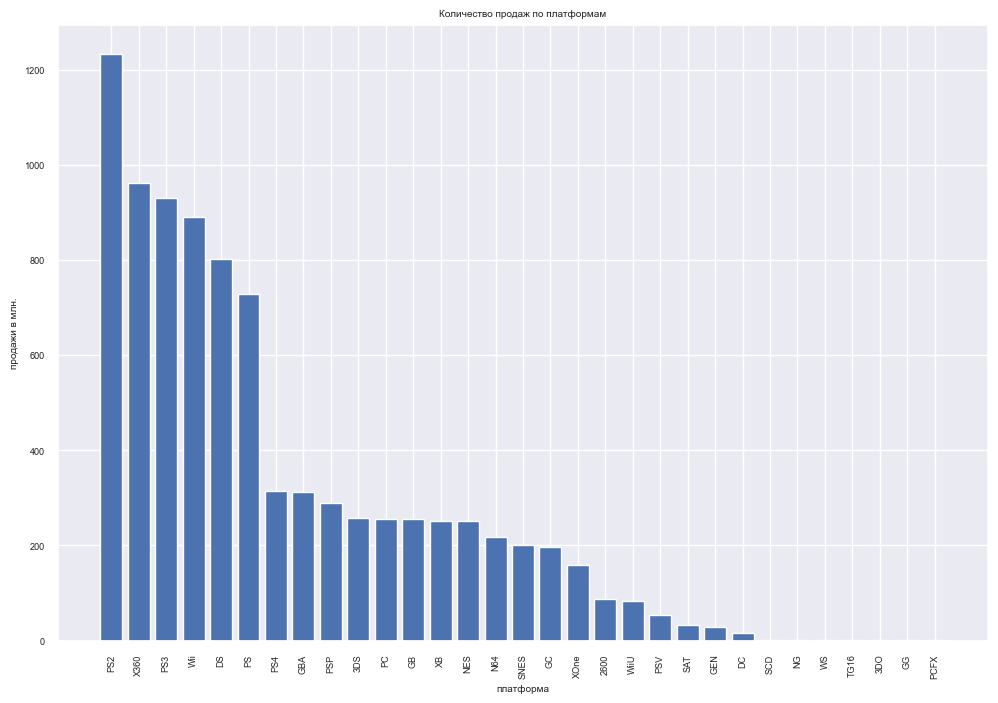

In [25]:
#построим столбчатую диаграмму колличества продаж по платформам за весь период
plt.bar(platform_by_sales.index, platform_by_sales['sales_total'])
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(rotation=90)
plt.title('Количество продаж по платформам')
plt.xlabel('платформа')
plt.ylabel('продажи в млн.')
plt.show()

Как видно из графика, самые прибыльные платформы - PS2, X360, PS3, Wii, DS, PS. А у платформы PC не смотря на то что платформа - рекодсмен по долгожительству, продажи не очень большие, только 11 место. Следовательно наше внимание в этом исследовании должно быть направлено на консольные платформы.

In [26]:
#сложим количество продаж по платформам в пределах каждого года (исключая найденный выброс)
sales_platforms_by_year = data.pivot_table(index=['year_of_release', 'platform'],  values='sales_total', aggfunc='sum').reset_index()
df_heatmap = sales_platforms_by_year.pivot("year_of_release", "platform", "sales_total")

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [ ]:
#функция, строящая количество продаж по заданной платформе
def barplot_for_platform(platform_data_index, platform_data, platform):
  plt.bar(platform_data_index, platform_data)
  plt.xticks(rotation=90)
  title = ('Количество продаж по платформe ' + platform + ' по годам')
  plt.title(title)
  plt.xlabel('год')
  plt.ylabel('продажи в млн.')  
  plt.show()
  print()

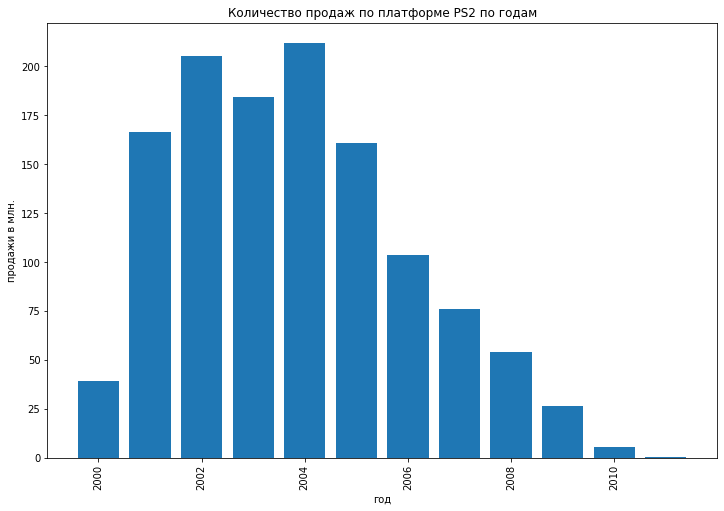

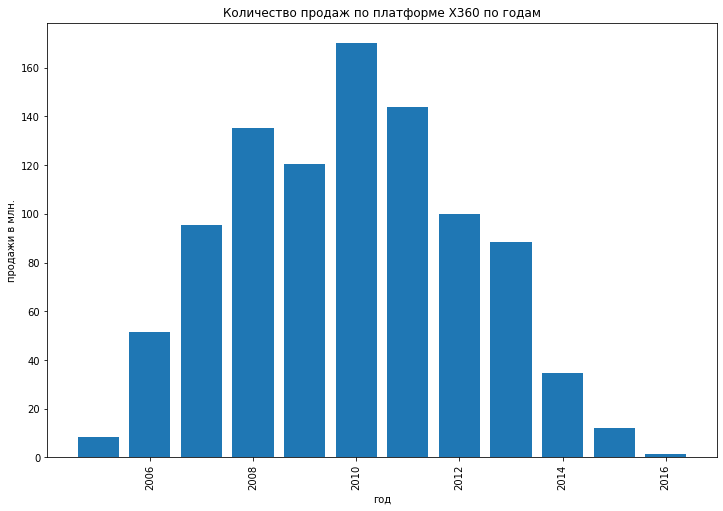

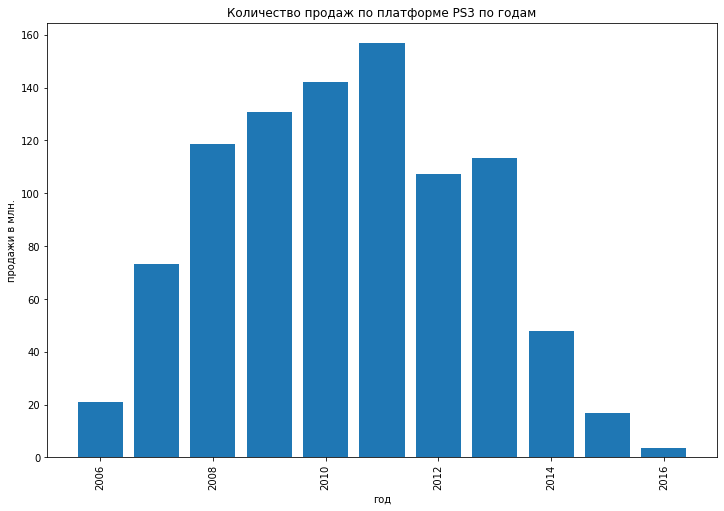

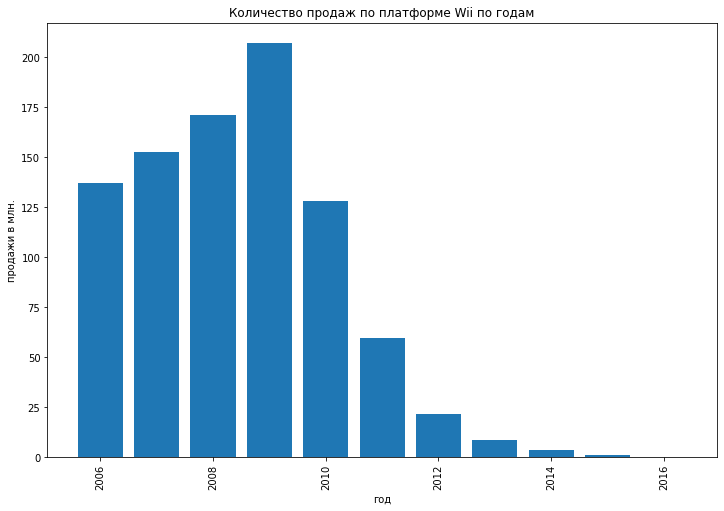

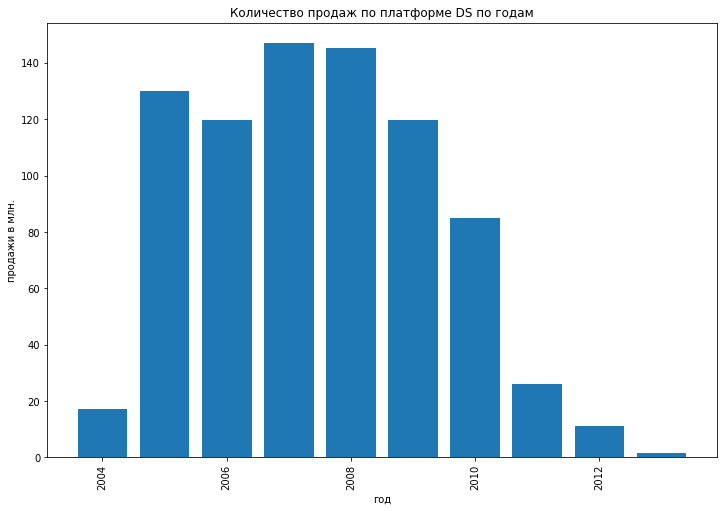

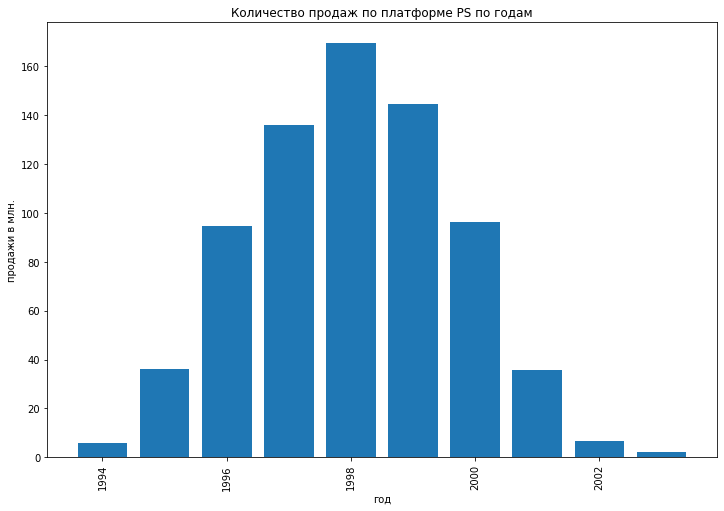

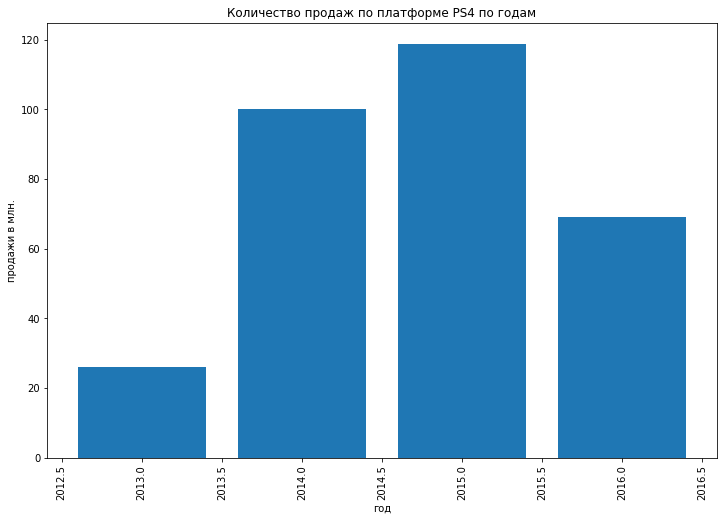

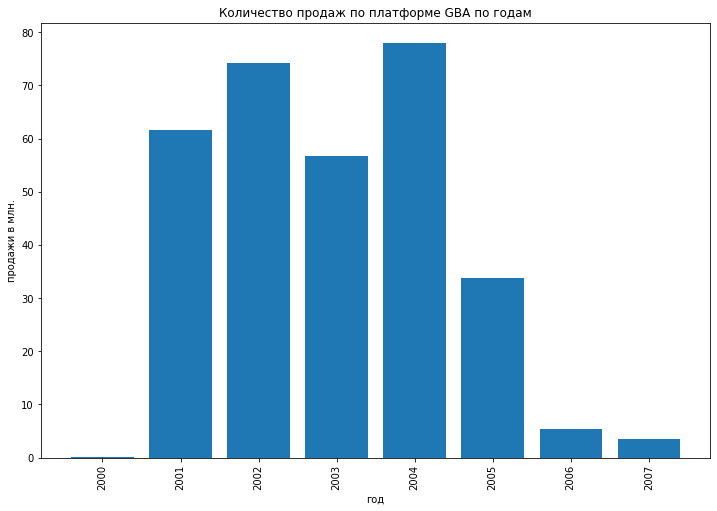

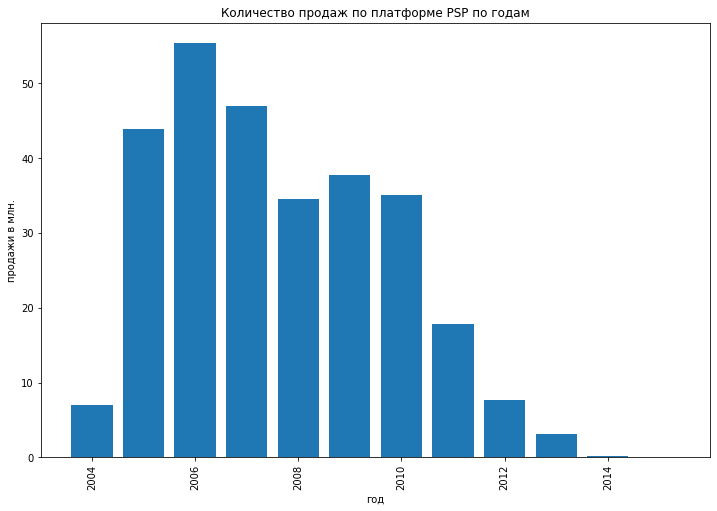

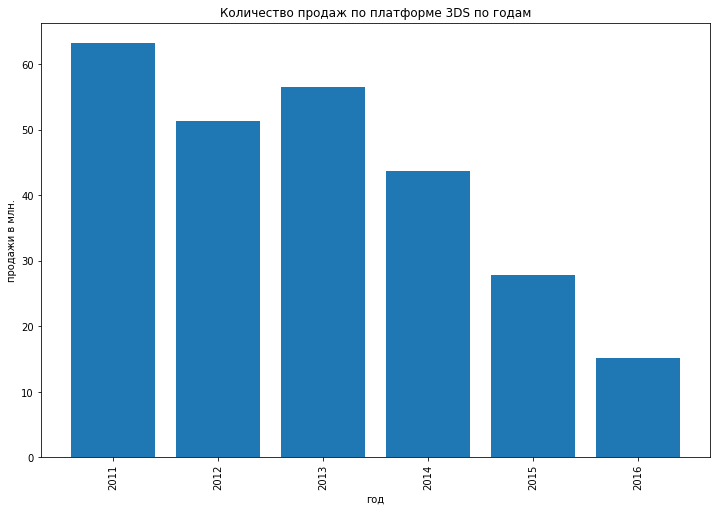

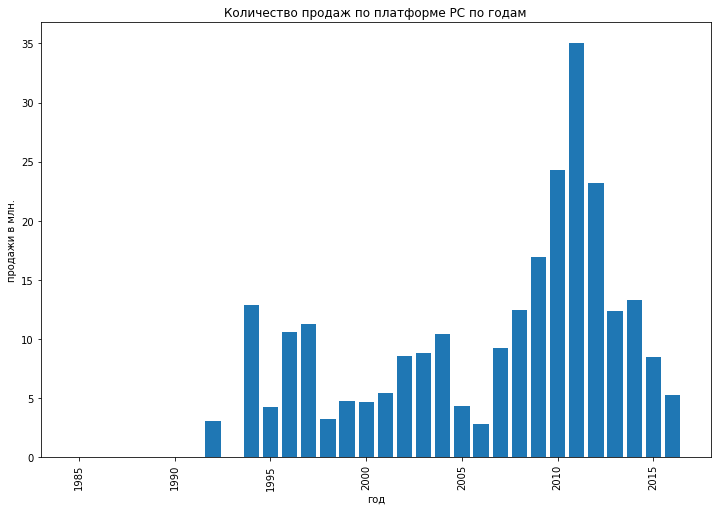

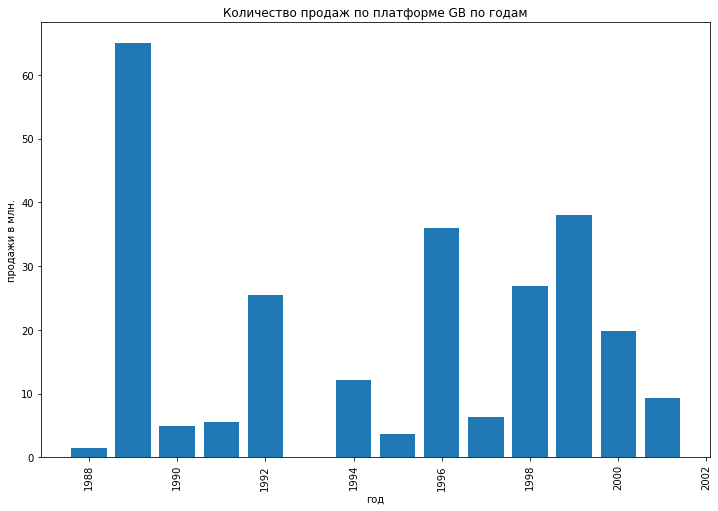

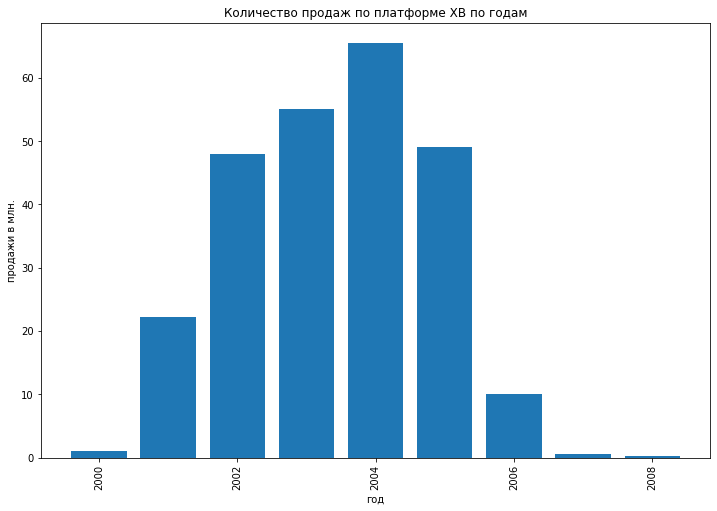

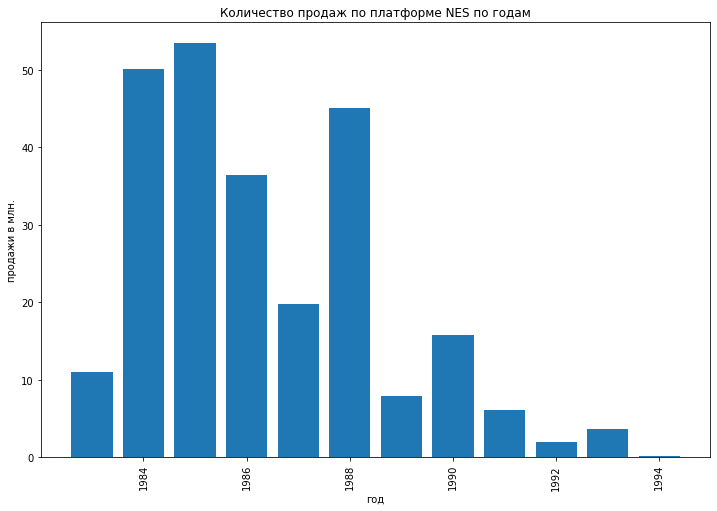

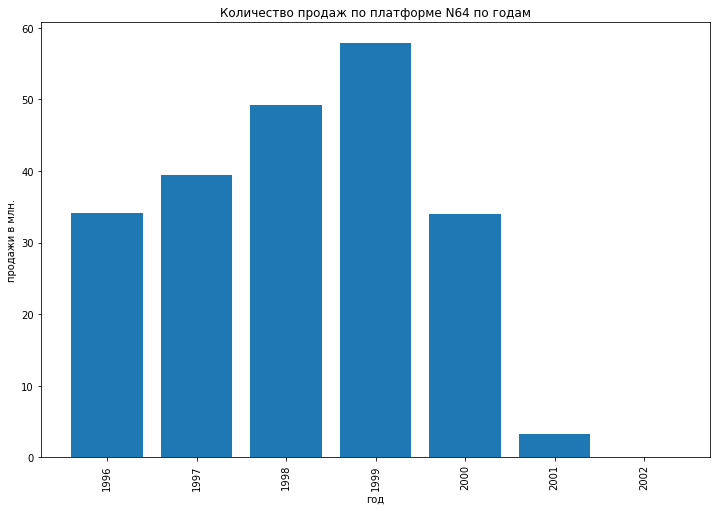

In [ ]:
#выведем графики продаж 15 самых популярных платформ
for i in platform_by_sales.head(15).index:
  barplot_for_platform(df_heatmap.index, df_heatmap[i], i)

Как видно из графиков как у новых платформ (PS4, 3DS), так и у старой PC количество продаж за 2016 год снизилось по отношению к предыдущему году. Другие новые платформы PSV, WiiU, XOne не попали в список топ-15.

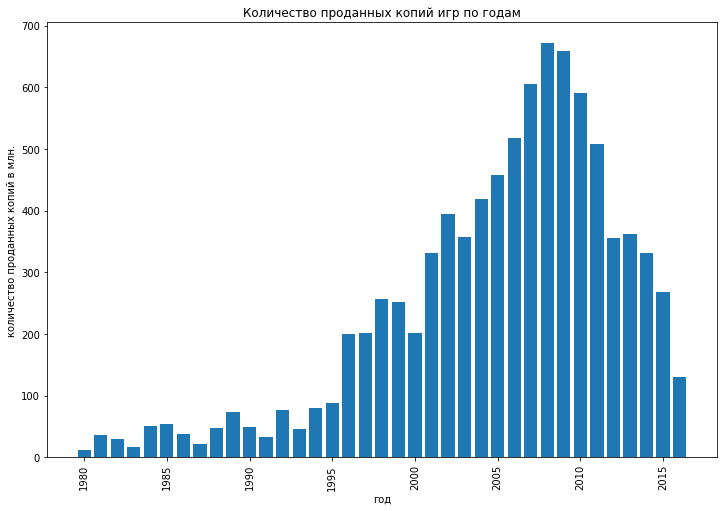

In [ ]:
#чтобы уточнить актуальный период построим график количествам проданных копий игр по годам
data_groupby_year_sales = data.groupby('year_of_release')['sales_total'].agg(['sum'])
#построим столбчатую диаграмму для количества вышедших игр по годам
plt.bar(data_groupby_year_sales.index, data_groupby_year_sales['sum'])
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(rotation=90)
plt.title('Количество проданных копий игр по годам')
plt.xlabel('год')
plt.ylabel('количество проданных копий в млн.')
plt.show()

Определим данные за актуальный период, которые помогут нам построить прогноз на 2017 год. Из графика количество игр по годам видно что в 2011 году было сильное падение продаж игр (с 500 млн. копипий до 300 млн. копий), с 2012 года по 2016 темпы падения продаж игр замедлились. В продолжении этого исследования будут использоваться данные с 2012 по 2016 год так, как они отображают более реальные уровни продаж игр по миру.

In [ ]:
data_cut = data.loc[(data['year_of_release'] > 2012)]

 ### Выбор потенциально потенциально прибыльных платформ

Как видно из тепловой карты игры в 2016 году выпускались только на платформах: 3DS, PC, PS3, PS4, PSV, Wii, WiiU, X360, XOne. Но платформы PS3, Wii, X360 сущуствуют уже 11, 11 и 12 лет соответсвенно. Эти платформы уже теряют свою популярность и им на замену пришло новое поколение консолей. Для прогназирования результата продаж на 2017 год уберем из выборки старые платформы.

In [ ]:
#список с "актуальными" платформами
next_platforms = ['3DS', 'PC', 'PS4', 'PSV', 'WiiU', 'XOne']
#удалим из датасета устаревшие платформы, на которых уже не выпускают игры
data_cut = data_cut.query('platform in @next_platforms')

/tmp/ipykernel_736/3989088258.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_heatmap_next = sales_next_platforms_by_year.pivot("year_of_release", "platform", "sales_total")


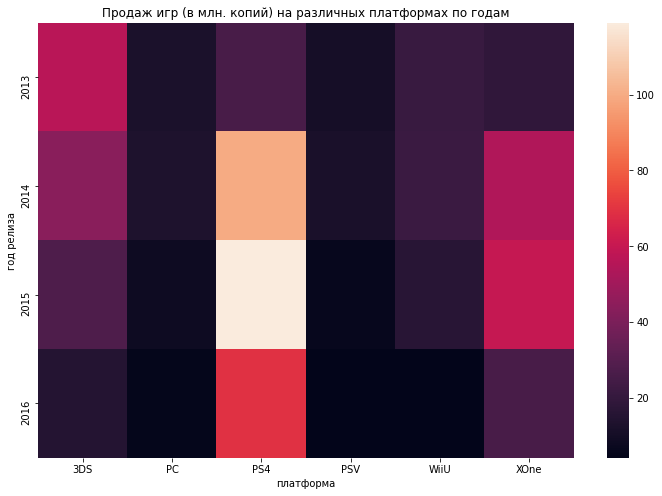

In [ ]:
#сложим количество продаж по платформам в пределах каждого года
sales_next_platforms_by_year = data_cut.pivot_table(index=['year_of_release', 'platform'],  values='sales_total', aggfunc='sum').reset_index()
df_heatmap_next = sales_next_platforms_by_year.pivot("year_of_release", "platform", "sales_total")
#строим тепловую карту продаж игр на различных платформах по годам
plt.title('Продаж игр (в млн. копий) на различных платформах по годам')
ax = sns.heatmap(df_heatmap_next)
ax.set(xlabel='платформа', ylabel='год релиза')
plt.show()

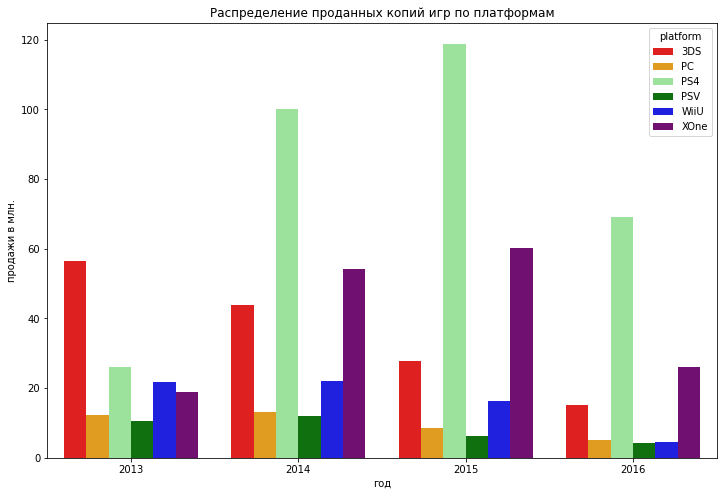

In [ ]:
#строим столбчатый график продаж по годам
ax = sns.barplot(x='year_of_release',
            y='sales_total',
            hue="platform",
            data=sales_next_platforms_by_year,
            palette=['red', 'orange', 'lightgreen', 'green', 'blue', 'purple'])

ax.set_title('Распределение проданных копий игр по платформам')
ax.set(xlabel='год', ylabel='продажи в млн.');

Как видно из графиков и тепловой карты самыми потенциально прибыльными платформами на следующий год являются PS4 и XOne. На этих платформах продажи растут от года к году (данные за 2016 год неполные). У платформ 3DS, PC, WiiU, PSV наблюдается тренд на снижение продаж.

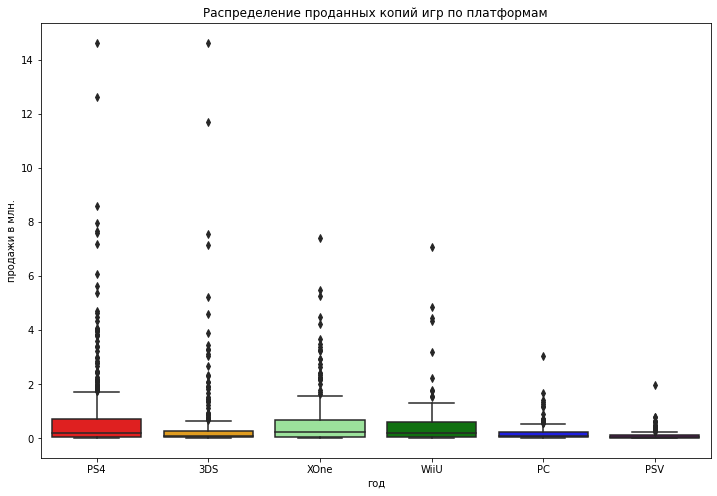

In [ ]:
#построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
ax = sns.boxplot(x='platform',
            y='sales_total',
            data=data_cut,
            palette=['red', 'orange', 'lightgreen', 'green', 'blue', 'purple'])

ax.set_title('Распределение проданных копий игр по платформам')
ax.set(xlabel='год', ylabel='продажи в млн.')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

Медианные значения у платформ PS4, XOne, WiiU не сильно отличаются. У платформ 3DS, PC, PSV медианные значения меньше чем у платформ PS4, XOne, WiiU. Платформы PS4, XOne, WiiU отличаются от всех остальных платформ сильным разбросом значений (длинные "усы"). У платформ PS4, 3DS, XOne наблюдается большое количеством выбросов.

Для выбора претендетов для будующей рекламной компании следует сконцентрироваться на платформах с сильным разбросом значений и большим количеством выбросов. При этом эти платформы должны набирать популярность и увеличивать число продаж год к году. Под эти критерии попадают PS4, XOne.

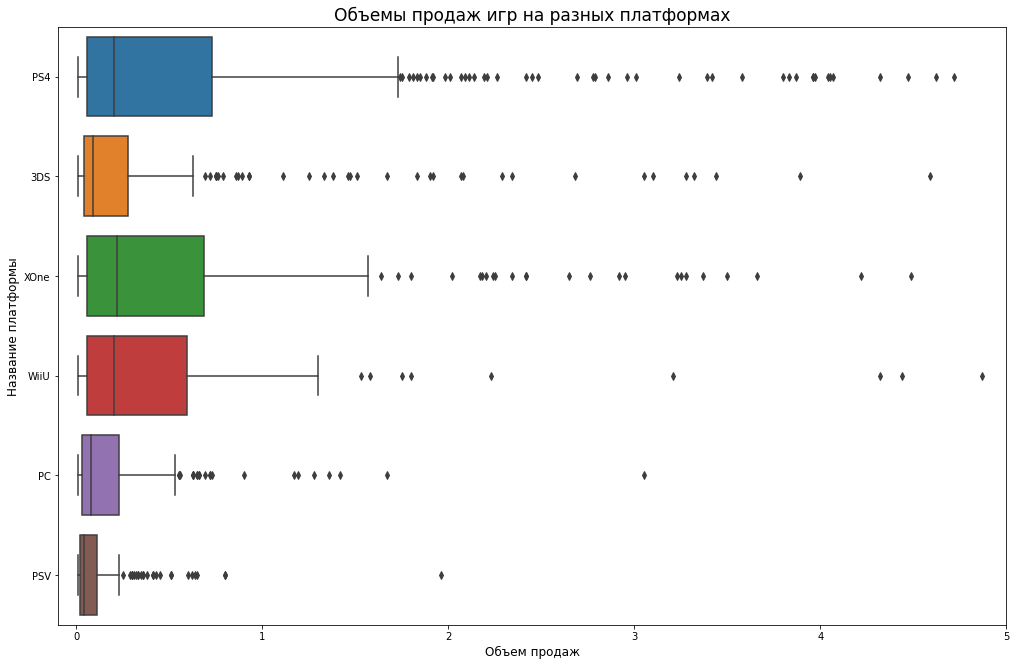

In [ ]:
# код ревьюера
plt.figure(figsize=(17, 11))
sns.boxplot(data=data_cut, y='platform', x='sales_total')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

### Исследования влияния отзывов пользователей и критиков

Рассмотрим влияют ли на продажи внутри самой популярной платформы PS4 отзывы пользователей и критиков.

In [ ]:
#функция, строящая диаграмму рассения и вычисляющая корреляцию
def scatter_and_corr(data, first_p, second_p, platform):
  data = data[data['platform'] == platform]
  data.plot(x=first_p, y=second_p, kind='scatter', alpha=1, figsize=(8,5))
  plt.title('Диаграмма рассеяния ' + second_p + ' от ' +  first_p + ' для ' + platform)
  plt.show()
  print()
  print('Корреляция между ' + second_p + ' и ' + first_p + ' равна ', round(data[first_p].corr(data[second_p]), 2))
  print()

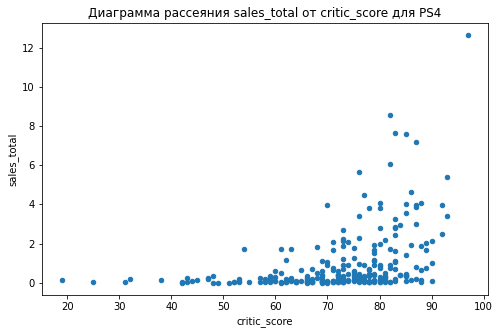


Корреляция между sales_total и critic_score равна  0.41



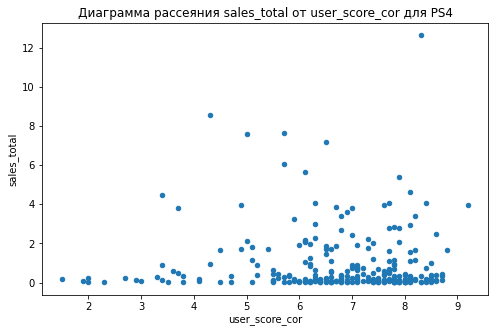


Корреляция между sales_total и user_score_cor равна  -0.03



In [ ]:
#список столбцов для нахождения зависимости
corr_list = ['critic_score', 'user_score_cor']

for i in corr_list:
  scatter_and_corr(data_cut, i, 'sales_total', 'PS4')

Как видно из графиков и значений корреляции между отзывами критиков и количеством проданных копий игры есть зависимость (корреляция 0.41). Между отзывами пользователей и количеством проданных копий игр зависимости нету (корреляция -0.03).

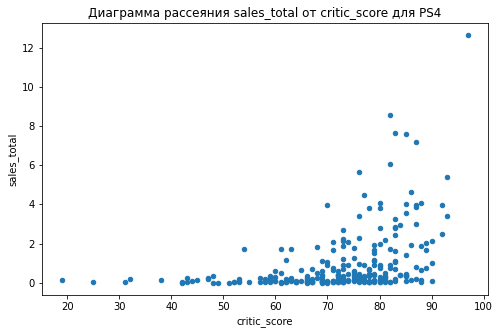


Корреляция между sales_total и critic_score равна  0.41



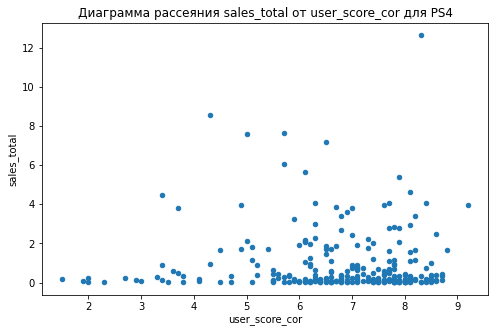


Корреляция между sales_total и user_score_cor равна  -0.03



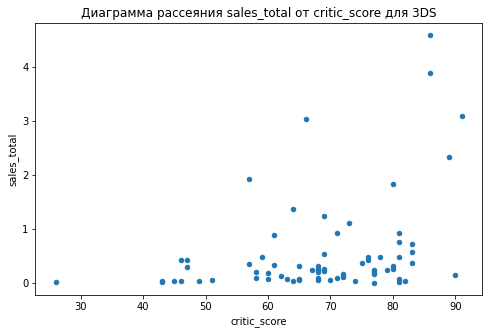


Корреляция между sales_total и critic_score равна  0.36



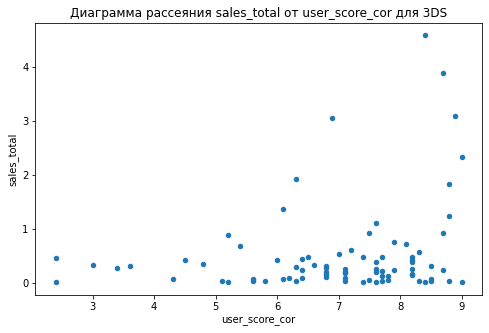


Корреляция между sales_total и user_score_cor равна  0.24



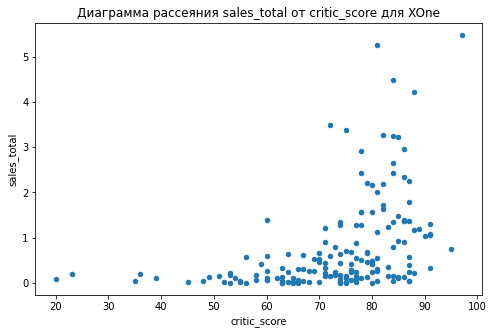


Корреляция между sales_total и critic_score равна  0.42



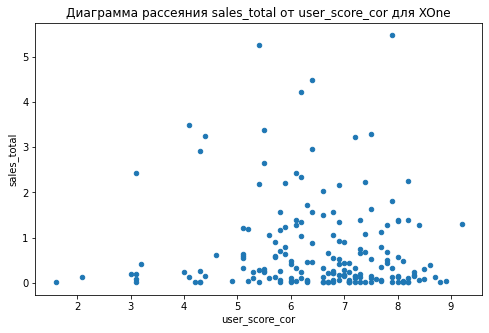


Корреляция между sales_total и user_score_cor равна  -0.07



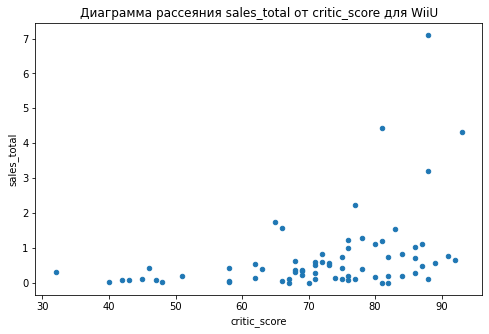


Корреляция между sales_total и critic_score равна  0.38



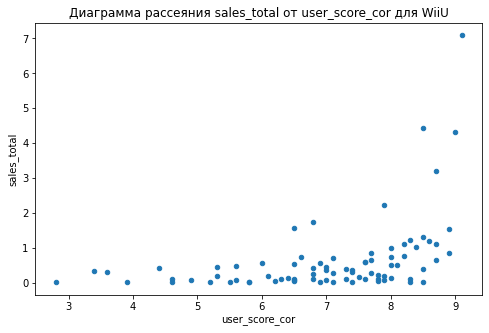


Корреляция между sales_total и user_score_cor равна  0.42



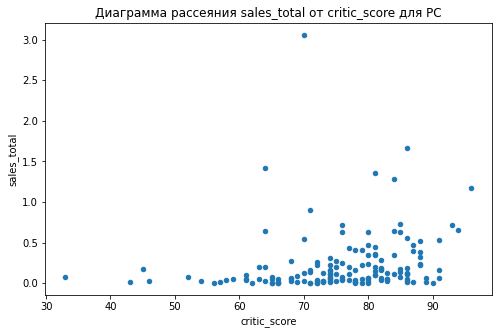


Корреляция между sales_total и critic_score равна  0.2



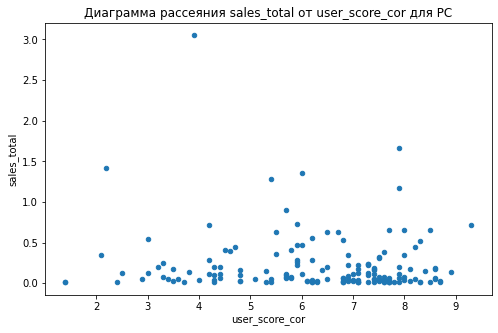


Корреляция между sales_total и user_score_cor равна  -0.09



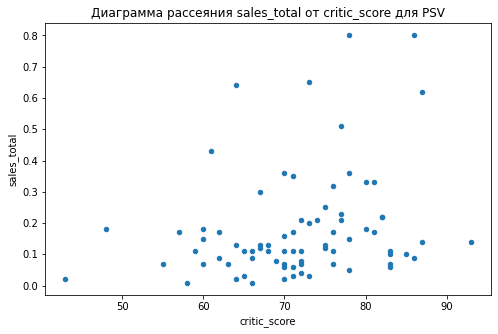


Корреляция между sales_total и critic_score равна  0.25



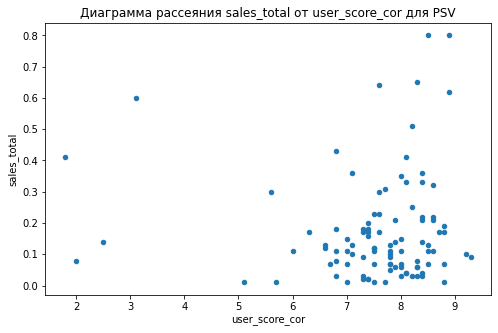


Корреляция между sales_total и user_score_cor равна  0.0



In [ ]:
#проверим зависимости для остальных платформ
for i in data_cut['platform'].unique():
  for j in corr_list:
    scatter_and_corr(data_cut, j, 'sales_total', i)

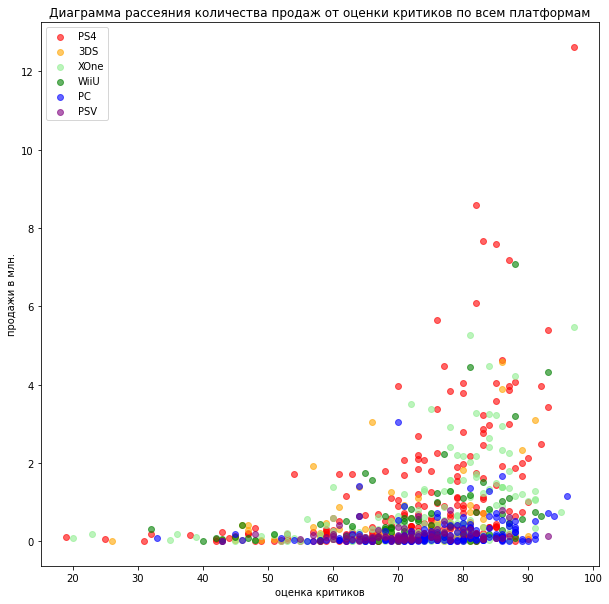


Корреляция между количеством продаж и оценками критиков 0.33


In [ ]:
#построим диаграмму рассеяния количетва продаж от оценки критиков по всем платформам
colors = ['red', 'orange', 'lightgreen', 'green', 'blue', 'purple']
fig = plt.figure()
ax1 = fig.add_subplot(111)
for i_color, j_flatform in enumerate(data_cut['platform'].unique()):
    ax1.scatter(x = data_cut[data_cut['platform'] == j_flatform]['critic_score'],
                y = data_cut[data_cut['platform'] == j_flatform]['sales_total'],
                color=colors[i_color],
                label=j_flatform,
                alpha = 0.6)
ax1.set(xlabel='оценка критиков', ylabel='продажи в млн.')
plt.legend(loc='upper left')
plt.title('Диаграмма рассеяния количества продаж от оценки критиков по всем платформам')
plt.show()

#найдем корреляцию между critic_score и sales_total
print()
print('Корреляция между количеством продаж и оценками критиков', round(data_cut['critic_score'].corr(data_cut['sales_total']), 2))

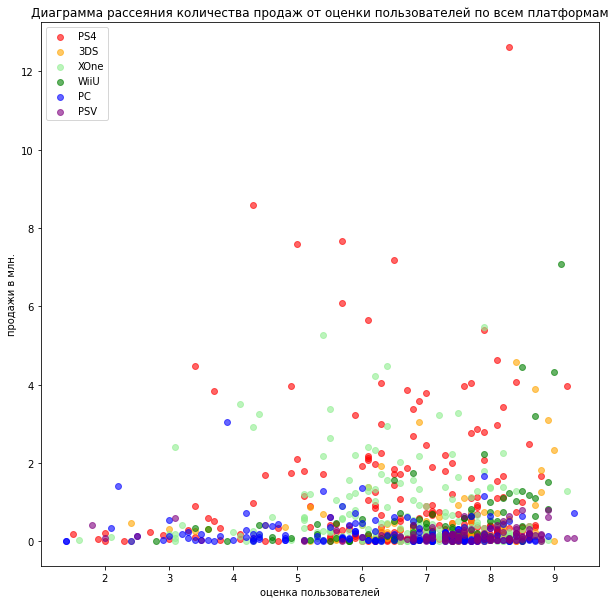


Корреляция между количеством продаж и оценками критиков 0.01


In [ ]:
#построим диаграмму рассеяния количетва продаж от оценки пользователей по всем платформам
fig = plt.figure()
ax1 = fig.add_subplot(111)
for i_color, j_flatform in enumerate(data_cut['platform'].unique()):
    ax1.scatter(x = data_cut[data_cut['platform'] == j_flatform]['user_score_cor'],
                y = data_cut[data_cut['platform'] == j_flatform]['sales_total'],
                color=colors[i_color],
                label=j_flatform,
                alpha = 0.6)
ax1.set(xlabel='оценка пользователей', ylabel='продажи в млн.')
plt.legend(loc='upper left')
plt.title('Диаграмма рассеяния количества продаж от оценки пользователей по всем платформам')
plt.show()

#найдем корреляцию между user_score_cor и sales_total
print()
print('Корреляция между количеством продаж и оценками критиков', round(data_cut['user_score_cor'].corr(data_cut['sales_total']), 2))

Как видно из диаграмм рассеяния и значений корреляций, по всем платформам наблюдается слабая зависимость количества продаж от оценок критиков (корреляция 0.33). Также подверждаются данные по PS4 о том, что количество продаж не зависит от оценок пользователей (корреляция 0.01).  

Отметим, что в отдельности не у всех платформ наблюдаются данные закономерности. Так, у PSV (корреляция 0.19) и у WiiU (корреляция 0.52) есть  зависимость количества продаж от оценок пользователей. У платформы 3DS также есть корреляция между количеством продаж и оценок пользователей, равная 0.28. Но по диаграмме рассеяния, распределение выглядит хаотичным. 

Отсюда можно слелать вывод что, для мобильных платформ оценки пользователей имееют значение для продаж, в отличие от стационарных платформ. 

### Распределение игр по жанрам

Рассмотрим общее распределение игр по жанрам.

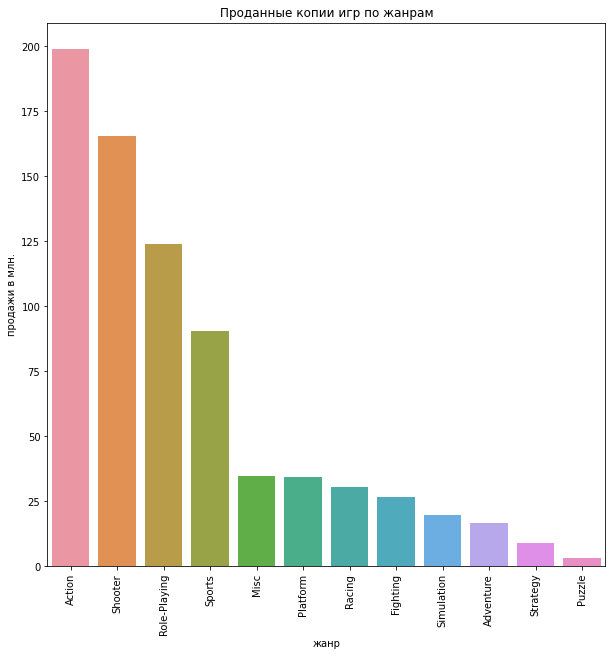

In [ ]:
#подготовим данные для построение столбчатого графика суммарных продаж по жанрам
data_cut_by_genre = data_cut.pivot_table(index=['genre'],  values='sales_total', aggfunc='sum').reset_index().sort_values(by='sales_total', ascending=False)
data_cut_by_genre.columns=['genre', 'sales_total']
#строим столбчатыйграфик суммарных продаж по жанрам
ax = sns.barplot(x='genre',
            y='sales_total',
            data=data_cut_by_genre)

ax.set_title('Проданные копии игр по жанрам')
ax.set(xlabel='жанр', ylabel='продажи в млн.')
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

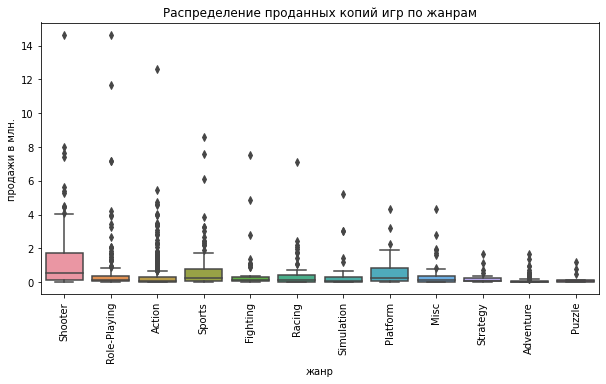

In [ ]:
#построим график «ящик с усами» по глобальным продажам игр в разбивке по жанрам
ax = sns.boxplot(x='genre',
            y='sales_total',
            data=data_cut)

ax.set_title('Распределение проданных копий игр по жанрам')
ax.set(xlabel='жанр', ylabel='продажи в млн.')
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

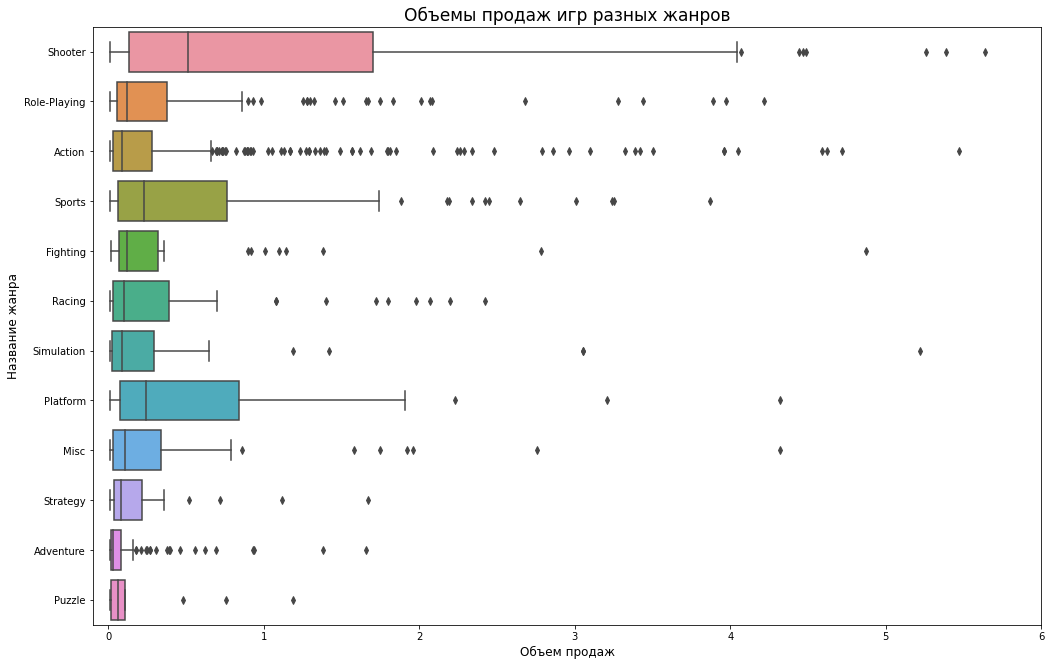

In [ ]:
# увеличенный вид
plt.figure(figsize=(17, 11))
sns.boxplot(data=data_cut, y='genre', x='sales_total')
plt.xlim(-0.1, 6)

plt.title('Объемы продаж игр разных жанров', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название жанра', size=12)

plt.show()

Можно выделить жанры с высокими продажами (Action, Shooter, Role-playing, Sports) и низкими продажами (Puzzle, Strategy, Adventure, Simulation, Fighting, Fighting, Racing, Platform, Misc). По диаграмме размаха видно что самое большое медианное значение у жанра Shooter.

У жанров Sports, Shooter, Platform сильный разброс значений (длинные "усы"). У жанров Action, Shooter, Role-playing, Sports большое количество выбросов (поэтому эти жанры входят в список с самыми высокими продажами).

**Вывод: В ходе исследовательского анализа данных был определен актуальный период (с 2012 года по 2016 год), а также актуальные платформы (3DS, PC, PS4, PSV, WiiU, XOne). По данным актуального периода были выбраны наиболее потенциальные платформы: PS4, XOne. Также было выявлено то, что на продажи игр влияют только отценки критиков, но не пользователей. Исключением из этой закономерности являются мобильные платформы, где есть зависимоть продаж как от отзывов критиков, так и от отзывов пользователей. Были определены жанры с наиболее высокими продажами: Action, Role-playing, Shooter, Sports.** 

## Портрет пользователя каждого региона

In [ ]:
#функция строящая графики по заданному параметру, по заданному региону
def top_region_plot(data, region_name, param):
  region = region_name + '_sales'
  data_groupby = data_cut.pivot_table(index=[param],  values=region, aggfunc='sum').reset_index().sort_values(by=region, ascending=False).head(5)
  #построим столбчатую диаграмму самых популярных жанров по регионам
  plt.bar(data_groupby[param], data_groupby[region])
  plt.xticks(rotation=90)
  plt.title('Самые популярные ' + param + ' по региону '  + region_name)
  plt.ylabel('продажи в млн.')  
  plt.show()
  print()

In [ ]:
data_cut['rating']

31       without
33       without
42             M
47       without
77             E
          ...   
16699    without
16703    without
16707    without
16712    without
16714    without
Name: rating, Length: 1604, dtype: object

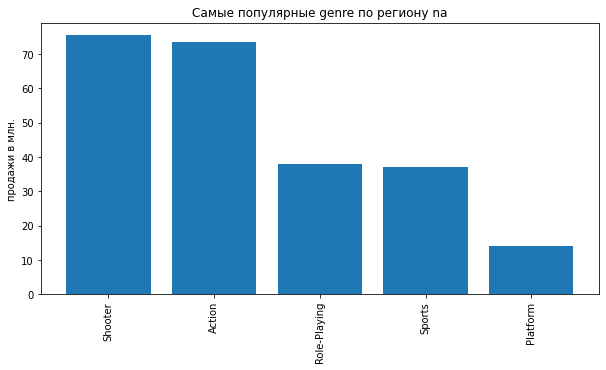

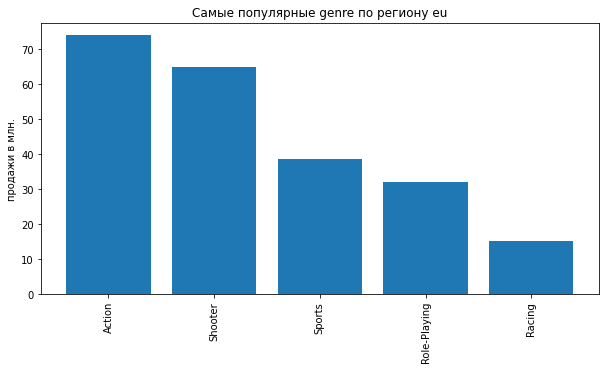

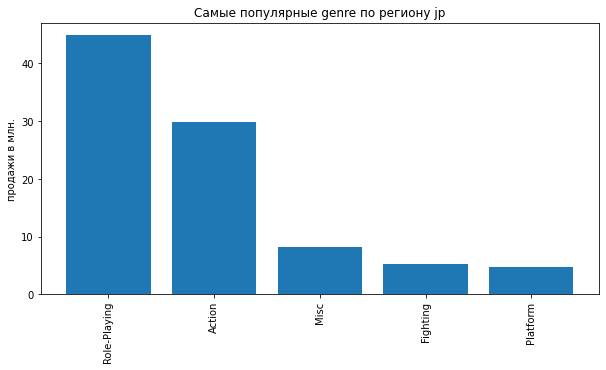

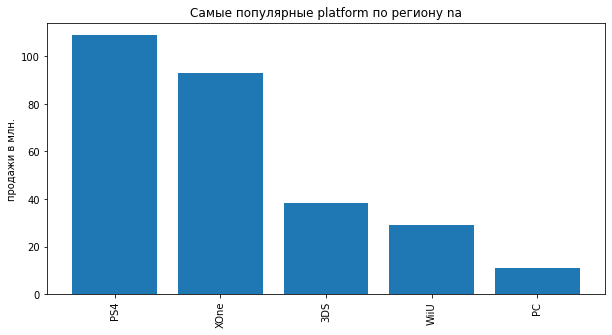

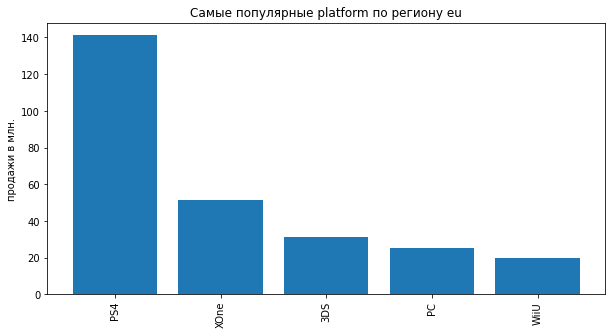

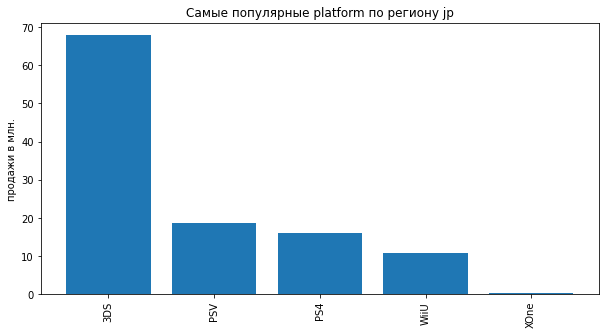

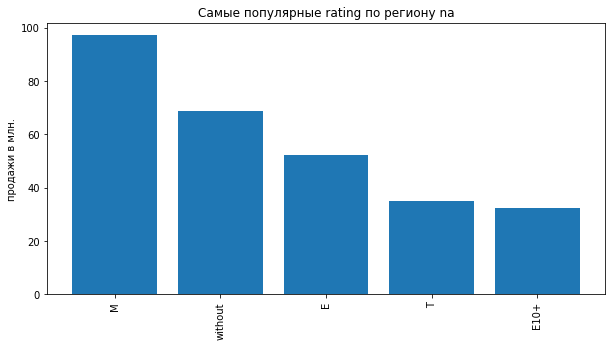

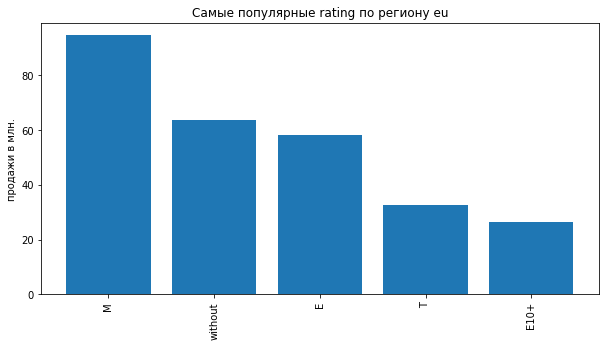

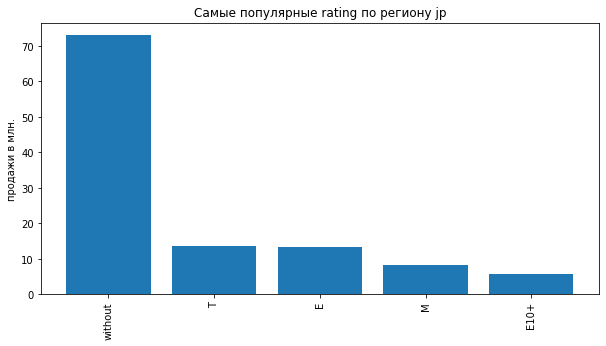

In [ ]:
#список регионов для анализа
regions = ['na', 'eu', 'jp']

for region in regions:
  top_region_plot(data_cut, region, 'genre')

for region in regions:
  top_region_plot(data_cut, region, 'platform')

for region in regions:
  top_region_plot(data_cut, region, 'rating')

Как видно из графиков предпочтения пользователей по жанрам из Северной Америки очень схожи с предпочтениями пользователей из Европы. Отличаются предпочтения пользователей из Японии, где очень популярен жанр Role-playing. Жанр Action очень популярен во всех трех регионах. 

По платформам также у пользователей из Северной Америки предпочтения очень схожи с предпочтениями пользователей из Европы (лидирующее положение занимают консоли PS4 и XOne), при этом в Европе PS4 популярнее XOne. Отличаются предпочтения пользователей из Японии (лидирующее положение занимает мобильная консоль 3DS). 

Из графиков распределения количества проданных копий по рейтингу ESRB, также видно что у пользователей из Северной Америки и Европы одинаковые предпочтения (самые популярные игры с рейтингом М - для взрослых). Отличаются предпочтения пользователей из Японии, контент с рейтингом М - для взрослых в Японии не пользуется большим спросом, а большинство проданных игр - без рейтинга.

**Вывод: В ходе исследования было обнаружено что предпочтения пользователей из Северной Америки схожи с предпочтениями пользователей Европы. Отличную спецификую имеет рынок игр в Японии. Это следует учитывать при прогнозировании продаж.  
В Северной Америке и Европе самые популярные - игры жанров Action, Shooter на платформах PS4, XOne с рейтингом М. В Японии самые популярные - игры жанров Role-playing, Action, Role-playing на платформе 3DS без рейтинга.**

## Проверка гипотез

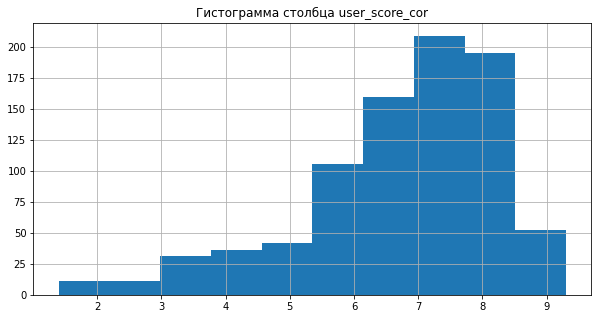

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score_cor, dtype: float64

In [ ]:
#строим гистограмму для столбца user_score_cor
data_cut['user_score_cor'].hist()
plt.title('Гистограмма столбца user_score_cor')
plt.show()

data['user_score_cor'].describe()

Как видно из гистограмы распределение пользовательских оценок немного скошено влево (отрицательно ассиметричное).

Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H_0: средние пользовательские рейтинги (user_score_cor) платформы Xbox One  = средние пользовательские рейтинги (user_score_cor) платформы PC  
H_a: средние пользовательские рейтинги (user_score_cor) платформы Xbox One  ≠ средние пользовательские рейтинги (user_score_cor) платформы PC

In [ ]:
#значение уровня значимости
alpha = 0.05

#вызов метода для проверки гипотезы
results = st.mannwhitneyu(data_cut[data_cut['platform'] =='PC']['user_score_cor'].dropna(),
                       data_cut[data_cut['platform'] =='XOne']['user_score_cor'].dropna())

# вывод значения p-value на экран
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5011006734622374
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получилось, из чего следует, что статистически значимыми различия между средними пользовательскими рейтингами пользователей платформы Xbox One и PC назвать нельзя.

Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные;

H_0: средние пользовательские рейтинги (user_score_cor) жанра Action  = средние пользовательские рейтинги (user_score_cor) жанра Sports  
H_a: средние пользовательские рейтинги (user_score_cor) жанра Action  ≠ средние пользовательские рейтинги (user_score_cor) жанра Sports 

In [ ]:
#значение уровня значимости
alpha = 0.05

#вызов метода для проверки гипотезы
results = st.mannwhitneyu(data_cut[data_cut['genre'] =='Action']['user_score_cor'].dropna(),
                       data_cut[data_cut['genre'] =='Sports']['user_score_cor'].dropna())

# вывод значения p-value на экран
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.6749927101630694e-14
Отвергаем нулевую гипотезу


Нулевую гипотезу получилось отвергнуть, из чего следует, что различия между средними пользовательскими рейтингами жанров  Action и Sports можно назвать статистически значимыми.

**Вывод: В этом разделе были проверены две гипотезы. Уровень значимости был в обоих гипотезах был задан 0.05, так как в рассчетах этого исследования не требуется слишком большая точность. Для проверки гипотез был выбран U-критерий Манна-Уитни так, как распределение пользовательских оценок имеет вид отрицательного ассиметричного. Опровергнуть заданные в ислледовании гипотезы не получилось.**

## Общий вывод

В рамках данного исследования были подготовлены и изучены данные по продажам игр. На этапе предобработки были обработаны пропущенные значения, были изменены некорректные типы данных, датасет был проверен на явные дубликаты, значения 'tbd' были замены на пропуски. Пропущенные значения в столбце с рейтингом были заменены значением without. После подготовки данных были определены актуальные данные, которые помогут построить прогноз на 2017 год. Были выбраны актуальные платформы на которых выходят новые игры, и из них были выбраны как самые перспективные PS4 и XOne. Было выявлено, что есть зависимость количества продаж от оценок критиков (корреляция 0.33), но нету зависимости между количеством продаж и оценками пользователей, за исключение мобильных консолей, для которых есть зависимость между количетвом продаж и оценками пользователей. В исследовании было построено распределние игр по жанрам и выбраны жанры с наиболее высокими продажами (Action, Shooter). В ходе исследования был составлен портрет пользователя каждого региона. При этом портрет пользователя Северной Америки похож на пользователя портрет Европы. Отличается и имеет свою специфику рынок игр в Японии. В последнем разделе исследования были проверены две предложенные гипотезы: о равенстве средних пользовательских оценок платформ PC и XOne, а также о  неравенстве средних пользовательских оценок жанра Action и Sports. В обоих случая гипотеза подтвердилась. 

Исходят из проделанного исследования, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании, нужно сконцентрировать рекламную компанию на играх в жанре Action, Shooter, с рейтингом М, на платформах PS4, XOne. Также хорошим продажам игры будет способствовать получение хороших отзывов у критиков (так, как между оценками критиков и продажами есть положительная зависимость для платформ PS4, XOne рекомендуется начинать рекламную компанию после получение игрой высоких оценок). Также для планирования рекламной компании необходимо знать регион основной аудитории интернет магазина. Учитывая, что аудитория магазина предположительно европейская, то сконцентрировать рекламную компанию лучше на играх платформы PS4 (т.к. в Европейском регионе продажи игр на PS4 превосходят продажи игр на XOne).

В дальнейшем можно продолжить данное исследования. Можно проанализирвоать предпочтения пользователей в динамике по годам и проверить не меняются ли их предпочтения. Некоторые игры выпускаются сразу на нескольких платформах и можно исследовать успешность издания более чем на одной платформе. Так, как в данном исследовании было опредлено что на продажи влияют оценки критиков, а не пользователей, в дальнейшем следует проверять гипотезы о среднем рейтинге критиков вместо пользователей.